# Requirements

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for Bitcoin. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- symbol - the resource for prediction
- open - the open price of BTC
- high - the high price of BTC
- low - the low price of BTC
- volumeBTC - the volume of trades BTC
- volumeUSD - the volume of trades USD
- close - the close price of BTC

Target:
close

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('BTC-Daily.csv')
data.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [5]:
data.isnull().sum()

date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2651 non-null   object 
 1   symbol      2651 non-null   object 
 2   open        2651 non-null   float64
 3   high        2651 non-null   float64
 4   low         2651 non-null   float64
 5   close       2651 non-null   float64
 6   Volume BTC  2651 non-null   float64
 7   Volume USD  2651 non-null   float64
dtypes: float64(6), object(2)
memory usage: 165.8+ KB


Explore the dataset using visualizations of your choice.

In [9]:
import matplotlib.pyplot as plt

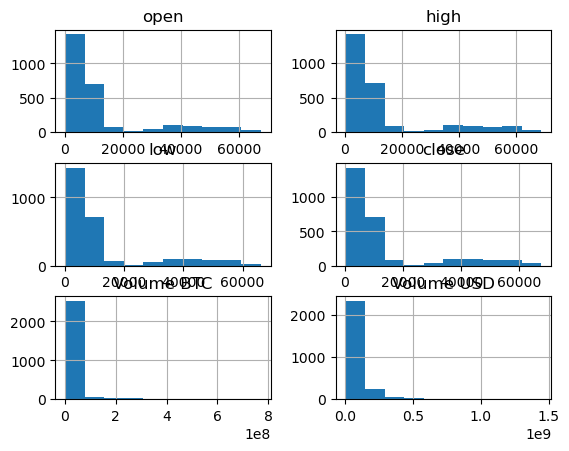

In [11]:
# Write your code here. Add as many boxes as you need.
data.hist()
plt.show()

In [13]:
data.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [15]:
label = LabelEncoder()
data['symbol'] = label.fit_transform(data['symbol'])

In [17]:
data.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,3/1/2022 0:00,0,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2/28/2022 0:00,0,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2/27/2022 0:00,0,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2/26/2022 0:00,0,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2/25/2022 0:00,0,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [19]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2651 entries, 2022-03-01 to 2014-11-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      2651 non-null   int32  
 1   open        2651 non-null   float64
 2   high        2651 non-null   float64
 3   low         2651 non-null   float64
 4   close       2651 non-null   float64
 5   Volume BTC  2651 non-null   float64
 6   Volume USD  2651 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 155.3 KB


In [21]:
data.head()

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2022-03-01,0,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,0,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,0,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,0,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,0,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [23]:
# Write your code here. Add as many boxes as you need.
for lag in range(1, 8):  # lag between 1 day and 7 days
    data[f'open_lag_{lag}'] = data['open'].shift(lag)
    data[f'high_lag_{lag}'] = data['high'].shift(lag)
    data[f'low_lag_{lag}'] = data['low'].shift(lag)
    data[f'volumeBTC_lag_{lag}'] = data['Volume BTC'].shift(lag)
    data[f'volumeUSD_lag_{lag}'] = data['Volume USD'].shift(lag)

data = data.dropna(axis=0)
data = data.drop(['open','high','low','Volume BTC','Volume USD'], axis= 1)
data.sample(5)

,symbol,close,open_lag_1,high_lag_1,low_lag_1,volumeBTC_lag_1,volumeUSD_lag_1,open_lag_2,high_lag_2,low_lag_2,...,open_lag_6,high_lag_6,low_lag_6,volumeBTC_lag_6,volumeUSD_lag_6,open_lag_7,high_lag_7,low_lag_7,volumeBTC_lag_7,volumeUSD_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2020-01-10,0,8200.00,8200.00,8286.00,8000.0,3.788327e+03,3.036807e+07,8008.10,8190.00,7960.00,...,8810.62,8852.35,8573.91,6.713258e+03,5.847349e+07,8715.39,9015.22,8661.52,9.363159e+03,8.326311e+07
2016-04-09,0,418.37,418.59,421.79,417.2,7.280359e+05,1.735020e+03,420.40,422.80,418.00,...,424.40,430.00,423.07,1.871353e+06,4.378600e+03,429.29,432.87,427.12,7.842825e+05,1.824130e+03
2021-11-22,0,56294.11,56283.80,57897.54,55128.6,2.732085e+03,1.573134e+08,57583.91,57750.20,55894.62,...,54764.24,57482.42,53308.93,1.377555e+03,7.898698e+07,57327.32,58931.07,56750.00,2.069735e+03,1.197241e+08
2019-05-29,0,8663.41,8663.07,9096.79,8000.0,1.525959e+04,1.263152e+08,8277.76,8589.99,8109.74,...,8103.63,8103.63,7432.84,1.548570e+04,1.187061e+08,7673.41,7924.48,7570.90,9.193712e+03,7.158169e+07
2016-05-22,0,437.85,438.72,442.91,436.4,1.126275e+06,2.555940e+03,442.63,446.37,441.00,...,470.58,529.08,468.00,6.154346e+06,1.246498e+04,522.13,540.00,485.00,4.221704e+06,8.124920e+03


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [25]:
# Write your code here. Add as many boxes as you need.
input = data.drop(['close'], axis=1)
target = data['close']

In [27]:
input.head()

,symbol,open_lag_1,high_lag_1,low_lag_1,volumeBTC_lag_1,volumeUSD_lag_1,open_lag_2,high_lag_2,low_lag_2,volumeBTC_lag_2,...,open_lag_6,high_lag_6,low_lag_6,volumeBTC_lag_6,volumeUSD_lag_6,open_lag_7,high_lag_7,low_lag_7,volumeBTC_lag_7,volumeUSD_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2022-02-22,0,38269.94,39303.24,37060.16,1778.275258,6.628375e+07,37253.26,39720.00,34324.05,6302.850957,...,37717.10,44256.08,37468.99,3160.618070,1.364723e+08,43221.71,43626.49,43185.48,49.006289,2.116360e+06
2022-02-21,0,37036.98,38463.88,36368.99,2388.759035,9.141766e+07,38269.94,39303.24,37060.16,1778.275258,...,39146.66,39886.92,37015.74,1701.817043,6.418008e+07,37717.10,44256.08,37468.99,3160.618070,1.364723e+08
2022-02-20,0,38384.09,39494.11,36810.72,3501.420364,1.298208e+08,37036.98,38463.88,36368.99,2388.759035,...,39242.64,40330.99,38600.00,912.724087,3.573010e+07,39146.66,39886.92,37015.74,1701.817043,6.418008e+07
2022-02-19,0,40108.62,40151.62,37974.18,1283.511547,4.925334e+07,38384.09,39494.11,36810.72,3501.420364,...,38360.93,39727.97,38027.61,2202.851827,8.642149e+07,39242.64,40330.99,38600.00,912.724087,3.573010e+07
2022-02-18,0,40008.75,40471.27,39587.08,695.654296,2.790201e+07,40108.62,40151.62,37974.18,1283.511547,...,37253.26,39720.00,34324.05,6302.850957,2.418838e+08,38360.93,39727.97,38027.61,2202.851827,8.642149e+07


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2, shuffle = False)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [45]:
#columns_to_keep = (X_train.shape[1] // lag) * lag
#X_train = X_train[:, :columns_to_keep]
#X_train = X_train.reshape(X_train.shape[0], lag, (X_train.shape[1] // lag))


In [47]:
#columns_to_keep = (X_test.shape[1] // lag) * lag
#X_test = X_test[:, :columns_to_keep] 
#X_test = X_test.reshape(X_test.shape[0], lag, (X_test.shape[1] // lag))


In [38]:
import numpy as np

In [40]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [42]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

## Neural Networks

Create an LSTM model and train it using the `train` function.

In [44]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [46]:
#model = Sequential([
    #Input(shape=(lag, X_train.shape[2])), # (timesteps, features)
    #LSTM(64, activation="relu", return_sequences=True),
    #LSTM(32, activation="relu"),
    #Dense(1, activation="linear")
#])

model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(64,activation='relu'))
model.add(Dense(1,activation='linear'))
          

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            54800     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 97,105
Trainable params: 97,105
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["accuracy"],
)

In [58]:
history = model.fit(X_train, Y_train,validation_split=0.2,epochs=64, batch_size=8)

Epoch 1/64
212/212 [==============================] - 4s 5ms/step - loss: 1587523747840.0000 - accuracy: 0.0000e+00 - val_loss: 10671644672.0000 - val_accuracy: 0.0000e+00
Epoch 2/64
212/212 [==============================] - 1s 3ms/step - loss: 292051255296.0000 - accuracy: 0.0000e+00 - val_loss: 2968386048.0000 - val_accuracy: 0.0000e+00
Epoch 3/64
212/212 [==============================] - 1s 3ms/step - loss: 118895902720.0000 - accuracy: 0.0000e+00 - val_loss: 1577610496.0000 - val_accuracy: 0.0000e+00
Epoch 4/64
212/212 [==============================] - 0s 2ms/step - loss: 70782255104.0000 - accuracy: 0.0000e+00 - val_loss: 1119819008.0000 - val_accuracy: 0.0000e+00
Epoch 5/64
212/212 [==============================] - 1s 2ms/step - loss: 26008424448.0000 - accuracy: 0.0000e+00 - val_loss: 1066790464.0000 - val_accuracy: 0.0000e+00
Epoch 6/64
212/212 [==============================] - 0s 2ms/step - loss: 20853286912.0000 - accuracy: 0.0000e+00 - val_loss: 587864064.0000 - val_acc

Use the trained model to make predictions for the test set.

In [62]:
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [64]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)

17/17 [==============================] - 0s 1ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Write your code here. Add as many boxes as you need.
r2_score(Y_test, y_pred)

-246.46346772581472

# Additional Bonus Task

Group the data by month. You can use [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) function.

Create an LSTM model to predict the 'close' price on a montly frequency.